In [1]:
import numpy as np
import pandas as pd

# Loading Data
### Since the size of data is 185 million we are reading it in chunks

In [2]:
chunk_size = 10000  # Adjust the chunk size based on available memory
chunks = []
for chunk in pd.read_csv('train.csv', chunksize=chunk_size):
    # Process each chunk as needed
    chunks.append(chunk)

# After processing all chunks, you can concatenate them if necessary
data = pd.concat(chunks, axis=0)

In [1]:
import numpy as np
import pandas as pd

In [3]:
data.shape

(184903890, 8)

# Data Cleaning

### Row Engineering - To handle Data Imbalance

In [4]:
import pandas as pd
import numpy as np

# Specify the chunk size
chunk_size = 10000

# Initialize an empty list to store processed chunks
balanced_chunks = []

# Read and process each chunk
for chunk in pd.read_csv('train.csv', chunksize=chunk_size):
    # Process each chunk as needed

    # Specify the target variable name
    target_variable = 'is_attributed'

    # Count of fraudulent records in the current chunk
    fraudulent_count = chunk[target_variable].sum()

    # Get non-fraudulent indices
    non_fraudulent_indices = chunk[chunk[target_variable] == 0].index

    # Randomly sample a subset of non-fraudulent indices
    sampled_non_fraudulent_indices = np.random.choice(non_fraudulent_indices, size=int(1.6 * fraudulent_count), replace=False)

    # Combine fraudulent and non-fraudulent data for the current chunk
    balanced_chunk = pd.concat([chunk[chunk[target_variable] == 1], chunk.loc[sampled_non_fraudulent_indices]])

    # Shuffle the combined data for the current chunk
    balanced_chunk = balanced_chunk.sample(frac=1).reset_index(drop=True)

    # Append the balanced chunk to the list
    balanced_chunks.append(balanced_chunk)

# Concatenate the balanced chunks along the rows (axis=0)
balanced_data = pd.concat(balanced_chunks, axis=0, ignore_index=True)


In [5]:
balanced_data.shape

(1180387, 8)

### Missing values handling

In [6]:
missing_values = balanced_data.isnull().sum()
missing_values

ip                      0
app                     0
device                  0
os                      0
channel                 0
click_time              0
attributed_time    723541
is_attributed           0
dtype: int64

### Removing unwanted columns

In [7]:
balanced_data = balanced_data.drop(['attributed_time'], axis=1)

In [8]:
missing_values = balanced_data.isnull().sum()
missing_values

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

### Dropping Duplicates

In [9]:
balanced_data = balanced_data.drop_duplicates()

In [10]:
balanced_data.shape

(1180070, 7)

### Datatype checking

In [11]:
balanced_data.dtypes

ip                int64
app               int64
device            int64
os                int64
channel           int64
click_time       object
is_attributed     int64
dtype: object

# Exploratory Data Analysis (EDA)

In [12]:
import pandas as pd

# Calculate the value counts for the 'ip' column
ip_counts = balanced_data['ip'].value_counts()

# Convert to DataFrame for a tabular view
ip_counts_table = ip_counts.reset_index()
ip_counts_table.columns = ['IP', 'Count']

# Display the table
print(ip_counts_table)


            IP  Count
0         5348   6978
1         5314   6509
2        73516   4019
3        73487   3904
4        53454   2006
...        ...    ...
255302  171545      1
255303  234239      1
255304  275288      1
255305  204994      1
255306  331467      1

[255307 rows x 2 columns]


In [13]:
import pandas as pd

# Calculate the value counts for the 'app' column
app_counts = balanced_data['app'].value_counts()

# Convert to DataFrame for a tabular view
app_counts_table = app_counts.reset_index()
app_counts_table.columns = ['App ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(app_counts_table)


     App ID   Count
0         3  144828
1        19  135593
2        12   97310
3         2   90808
4         9   82747
5        18   69550
6        15   64690
7        35   64185
8        29   42348
9        14   42234
10       10   37156
11        5   28672
12        1   23830
13        8   21299
14       11   18948
15       13   17989
16       45   16553
17       21   14442
18       26   13716
19       72   11500
20       23   10575
21       20   10348
22        6    9979
23        7    8258
24       64    8076
25       27    7393
26       25    5711
27       28    5266
28       39    5246
29       24    5218
30       66    4218
31       17    3581
32       32    3107
33       22    2990
34       84    2798
35       83    2482
36       62    2196
37      107    2184
38       37    2184
39       50    1798
40       96    1736
41      108    1623
42       55    1507
43       79    1437
44       43    1389
45       36    1364
46      150    1153
47       34    1152
48      115    1139


In [14]:
import pandas as pd

# Calculate the value counts for the 'device' column
device_counts = balanced_data['device'].value_counts()

# Convert to DataFrame for a tabular view
device_counts_table = device_counts.reset_index()
device_counts_table.columns = ['Device ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(device_counts_table)


      Device ID   Count
0             1  989307
1             0  105562
2             2   33433
3             6    2973
4          3032    2832
5            40    2648
6            16    2236
7            18    1494
8            21    1168
9            33    1113
10         3543     935
11           67     822
12           30     818
13           88     757
14          114     727
15         3866     695
16           37     672
17          154     670
18          109     625
19            7     612
20           78     609
21           50     590
22           97     493
23           46     474
24           82     433
25           60     429
26          211     410
27           56     347
28          136     341
29          299     340
30          220     334
31           96     330
32            4     322
33           76     311
34           25     308
35          343     298
36          101     298
37          203     294
38          137     270
39            9     267
40           20 

In [15]:
import pandas as pd

# Calculate the value counts for the 'os' column
os_counts = balanced_data['os'].value_counts()

# Convert to DataFrame for a tabular view
os_counts_table = os_counts.reset_index()
os_counts_table.columns = ['OS ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(os_counts_table)


     OS ID   Count
0       19  253180
1       13  216855
2       24   48820
3       17   48782
4       18   46946
5       22   42309
6        0   39379
7       10   26960
8        8   26182
9        6   23685
10      15   21658
11      25   21148
12      20   20811
13       9   20227
14      29   19841
15      37   19622
16      21   19569
17      16   16313
18       3   13715
19      14   13673
20      32   13537
21      27   13170
22      38   12614
23      41   11751
24      47   11573
25      11   11364
26       1   10975
27      30   10615
28      12    9493
29      36    8567
30      23    8509
31      35    8094
32       4    8016
33      43    7099
34      50    6830
35      28    6662
36       7    6333
37      53    5648
38      61    5572
39      26    4636
40      40    4437
41      31    4010
42     607    3786
43      49    3552
44       2    2776
45     748    1810
46      42    1774
47     866    1616
48      34    1389
49      46    1281
50      59    1273
51      58  

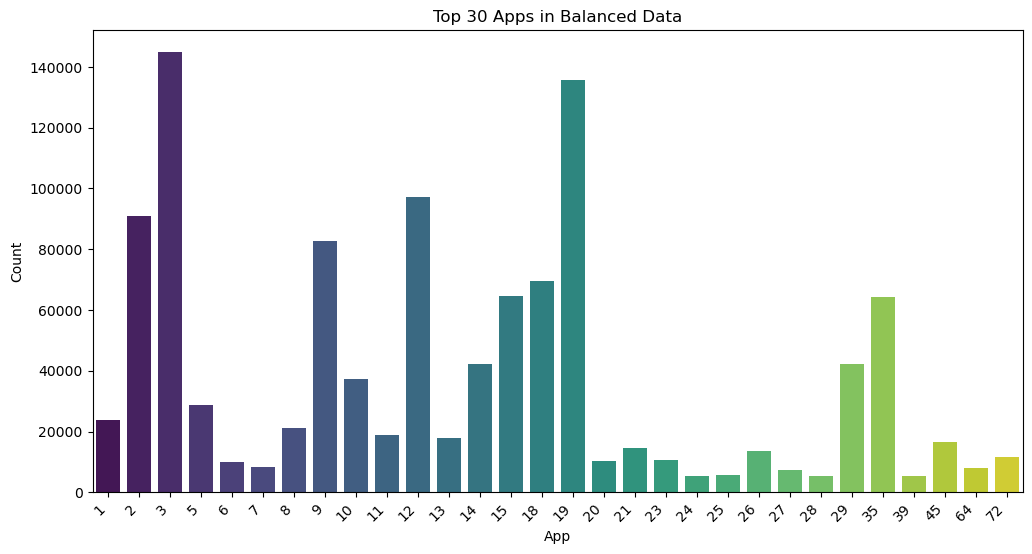

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 values for the 'app' column
top_apps = balanced_data['app'].value_counts().nlargest(30)

# Set the figure size
plt.figure(figsize=(12, 6))

# Use Seaborn for better visualization
sns.barplot(x=top_apps.index, y=top_apps, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Top 30 Apps in Balanced Data')

# Show the plot
plt.show()


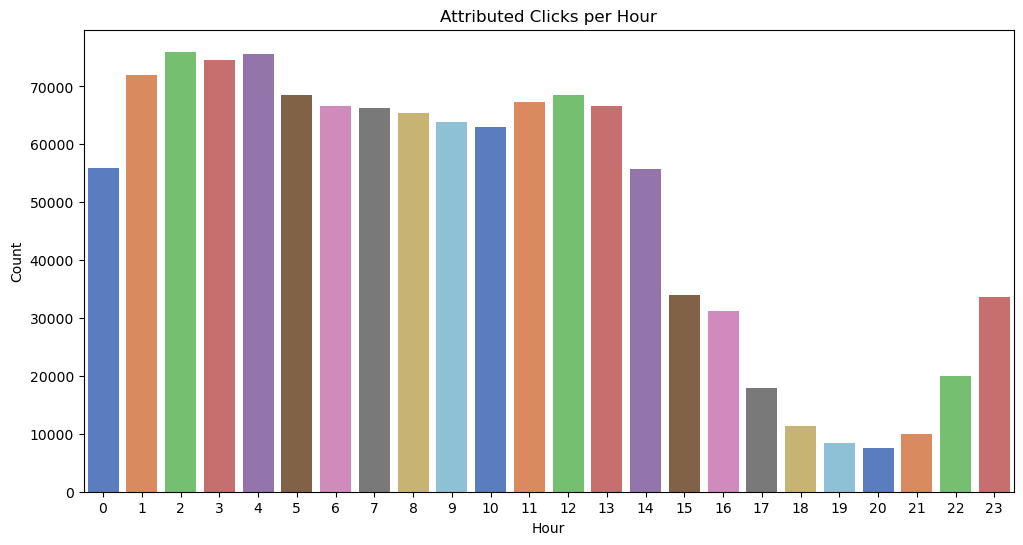

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'click_time' to datetime
balanced_data['click_time'] = pd.to_datetime(balanced_data['click_time'])

# Extract the hour from 'click_time'
balanced_data['hour'] = balanced_data['click_time'].dt.hour

# Get the unique hours and sort them
sorted_hours = sorted(balanced_data['hour'].unique())

# Plotting for attributed clicks per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=balanced_data, palette='muted', order=sorted_hours)
plt.title('Attributed Clicks per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


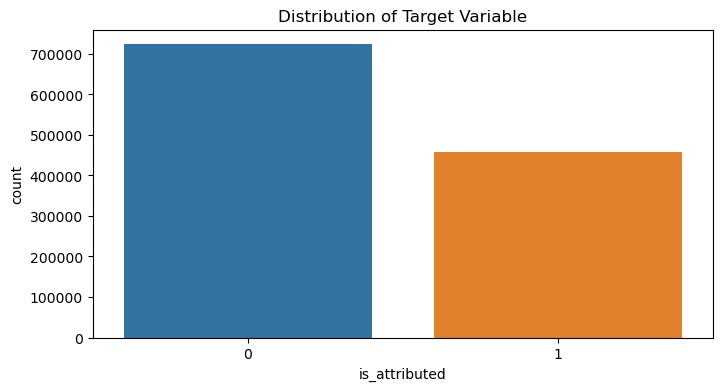

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x='is_attributed', data=balanced_data)
plt.title('Distribution of Target Variable')
plt.show()

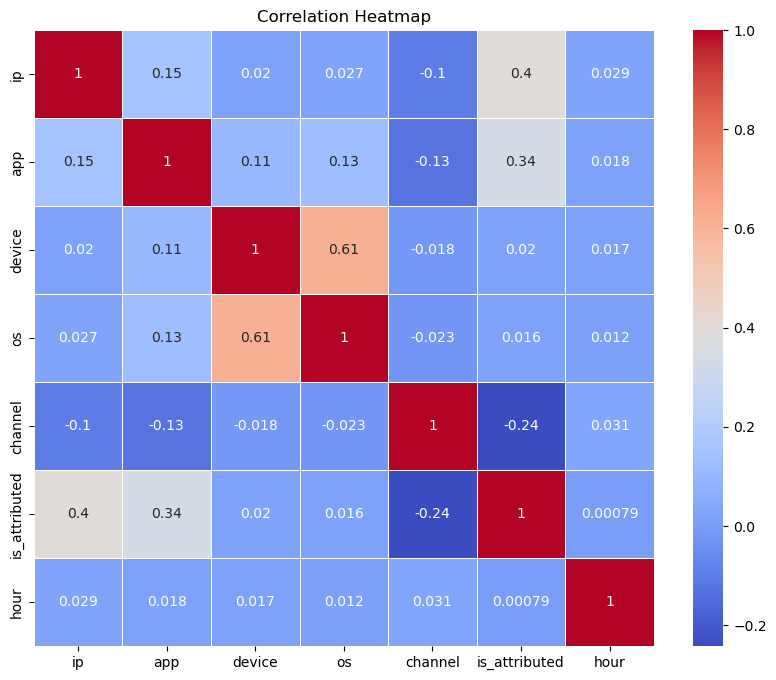

In [19]:
correlation_matrix = balanced_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

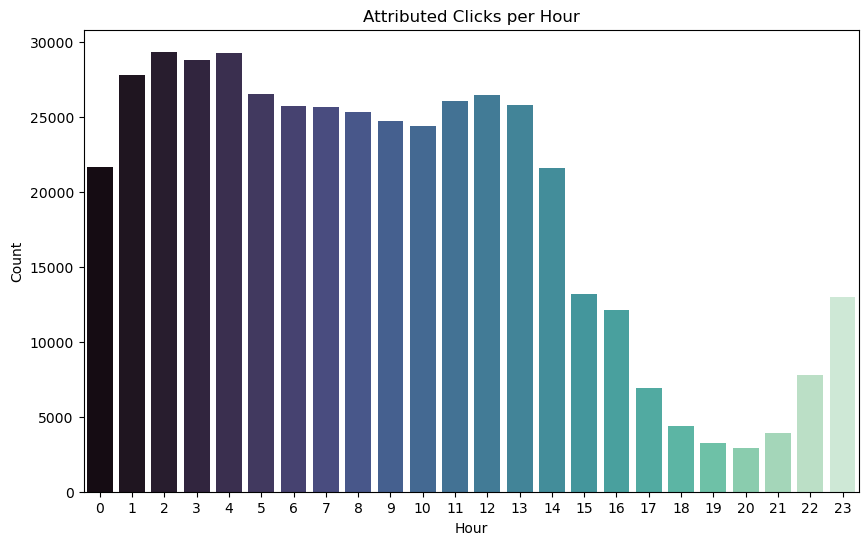

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Plotting for attributed clicks per hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=attributed_data, palette='mako')
plt.title('Attributed Clicks per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


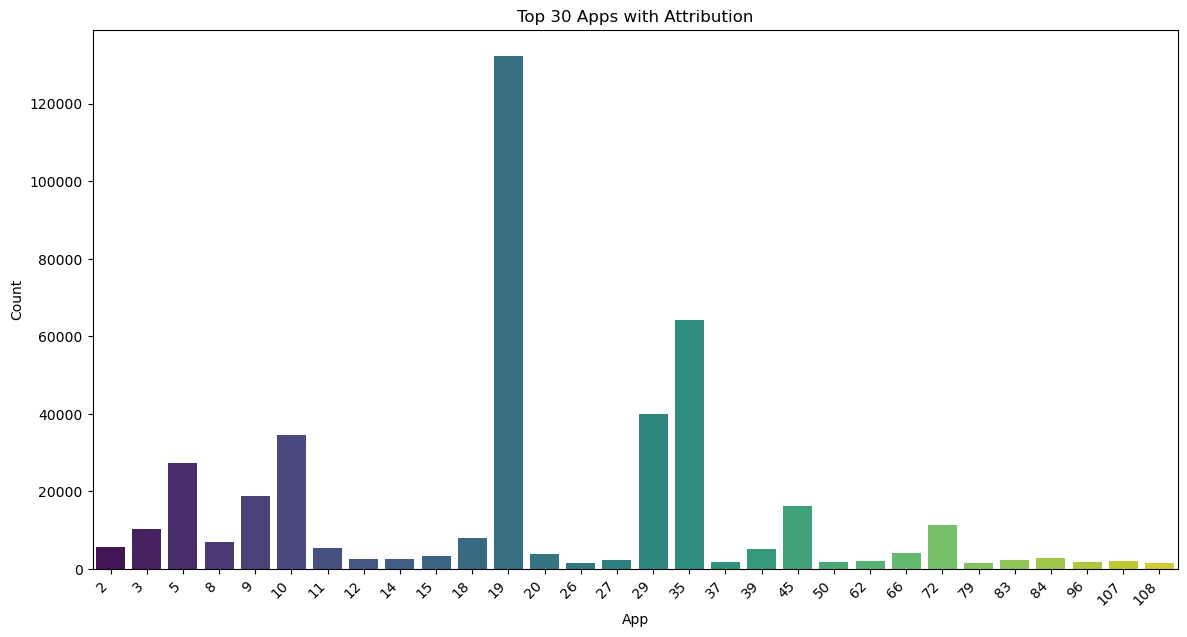

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Get the top 30 apps
top_apps_attributed = attributed_data['app'].value_counts().nlargest(30)

# Set the figure size
plt.figure(figsize=(14, 7))

# Use Seaborn for better visualization
sns.barplot(x=top_apps_attributed.index, y=top_apps_attributed, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Top 30 Apps with Attribution')

# Show the plot
plt.show()


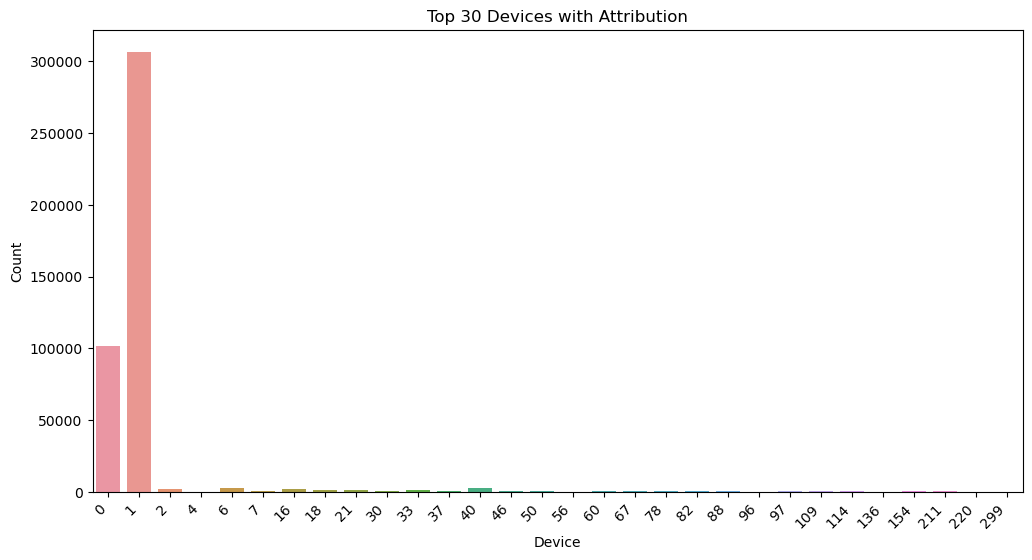

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'balanced_data' is your DataFrame

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Get the top 30 devices and OS
top_devices_attributed = attributed_data['device'].value_counts().nlargest(30)
top_os_attributed = attributed_data['os'].value_counts().nlargest(30)

# Plotting for top devices
plt.figure(figsize=(12, 6))
sns.barplot(x=top_devices_attributed.index, y=top_devices_attributed)
plt.title('Top 30 Devices with Attribution')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


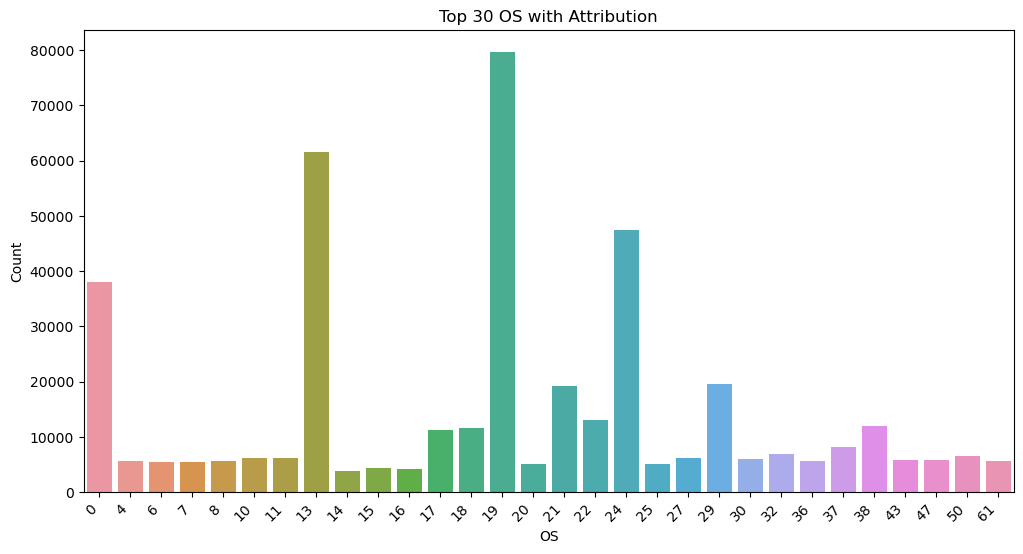

In [23]:
# Plotting for top OS
plt.figure(figsize=(12, 6))
sns.barplot(x=top_os_attributed.index, y=top_os_attributed)
plt.title('Top 30 OS with Attribution')
plt.xlabel('OS')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


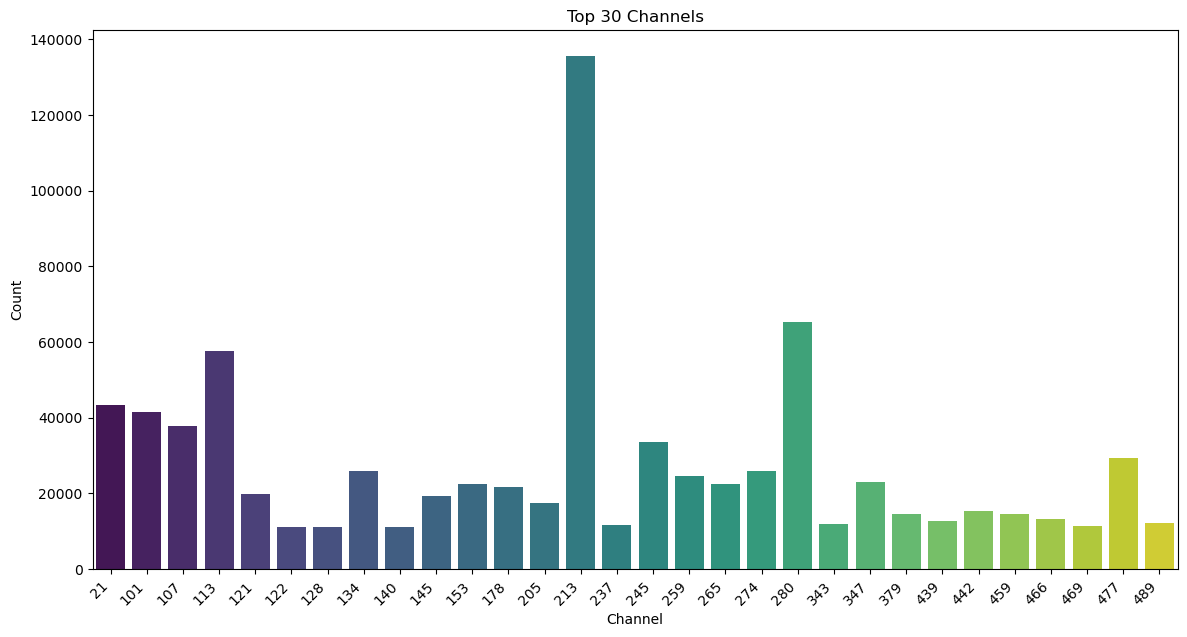

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Calculate the number of clicks per channel
clicks_per_channel = balanced_data['channel'].value_counts()

# Get the top 30 channels
top_channels = clicks_per_channel.nlargest(30)

# Plotting for clicks per channel
plt.figure(figsize=(14, 7))
sns.barplot(x=top_channels.index, y=top_channels, palette='viridis')
plt.title('Top 30 Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



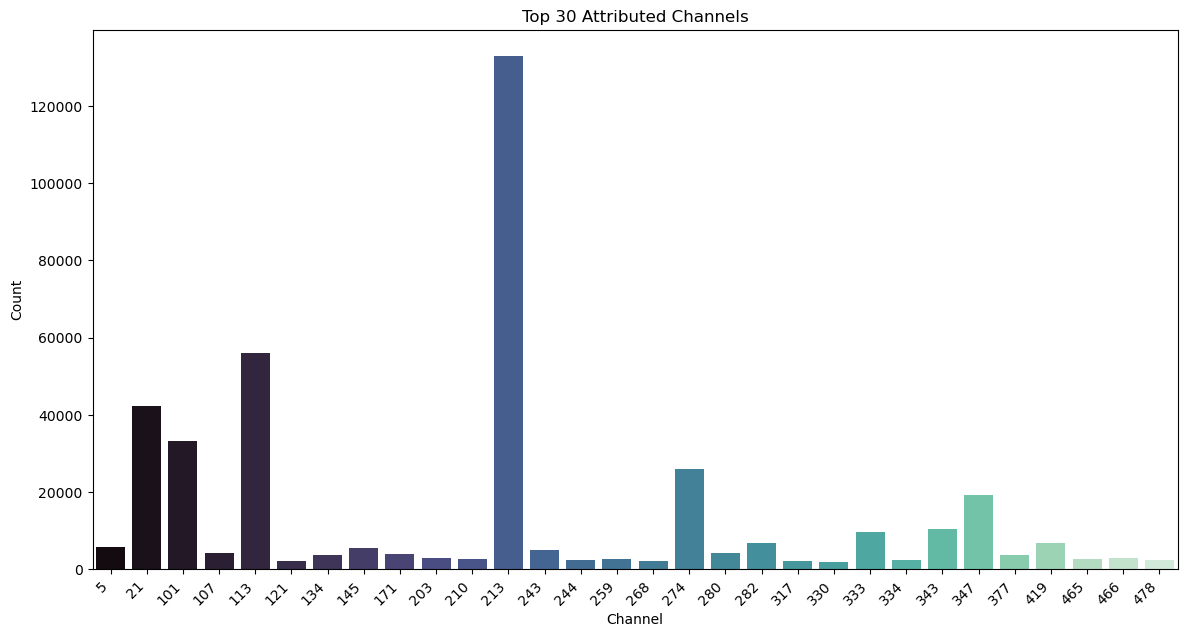

In [25]:
# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Calculate the number of attributed clicks per channel
attributed_clicks_per_channel = attributed_data['channel'].value_counts()

# Get the top 30 attributed channels
top_attributed_channels = attributed_clicks_per_channel.nlargest(30)

# Plotting for top attributed channels
plt.figure(figsize=(14, 7))
sns.barplot(x=top_attributed_channels.index, y=top_attributed_channels, palette='mako')
plt.title('Top 30 Attributed Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


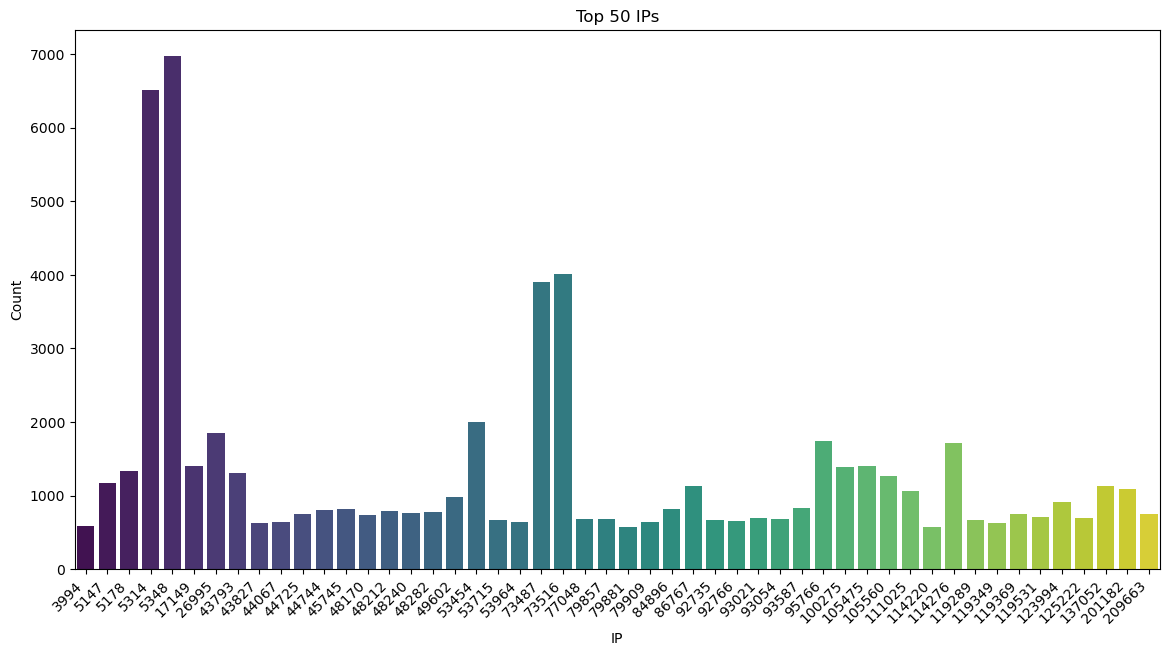

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of clicks per IP
clicks_per_ip = balanced_data['ip'].value_counts()

# Get the top 50 IPs
top_ips = clicks_per_ip.nlargest(50)

# Plotting for top 50 IPs
plt.figure(figsize=(14, 7))
sns.barplot(x=top_ips.index, y=top_ips, palette='viridis')
plt.title('Top 50 IPs')
plt.xlabel('IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


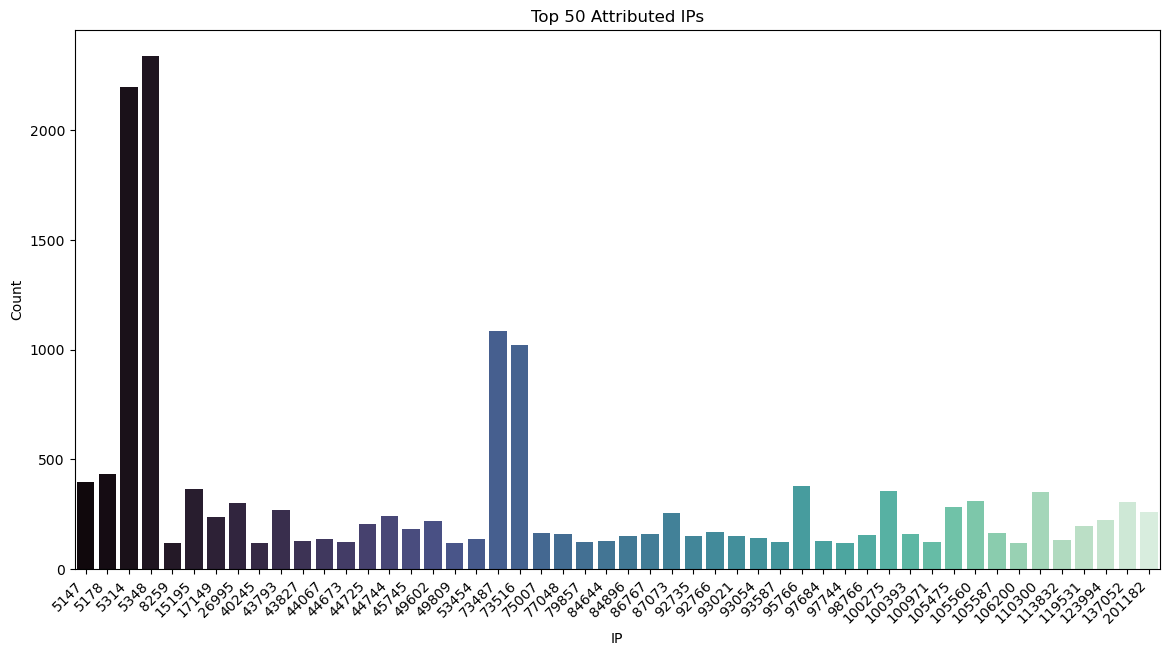

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Calculate the number of attributed clicks per IP
attributed_clicks_per_ip = attributed_data['ip'].value_counts()

# Get the top 50 attributed IPs
top_attributed_ips = attributed_clicks_per_ip.nlargest(50)

# Plotting for top 50 attributed IPs
plt.figure(figsize=(14, 7))
sns.barplot(x=top_attributed_ips.index, y=top_attributed_ips, palette='mako')
plt.title('Top 50 Attributed IPs')
plt.xlabel('IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your balanced dataset as 'balanced_data' (assumed to be preprocessed and split into features and target)

# Extract the 'hour' feature from the 'click_time' column
balanced_data['hour'] = balanced_data['click_time'].dt.hour

# Drop the 'click_time' column
balanced_data = balanced_data.drop('click_time', axis=1)

# Split the data into features and target variable
X = balanced_data.drop('is_attributed', axis=1)
y = balanced_data['is_attributed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.69
Recall: 0.65
F1 Score: 0.67
ROC AUC: 0.81



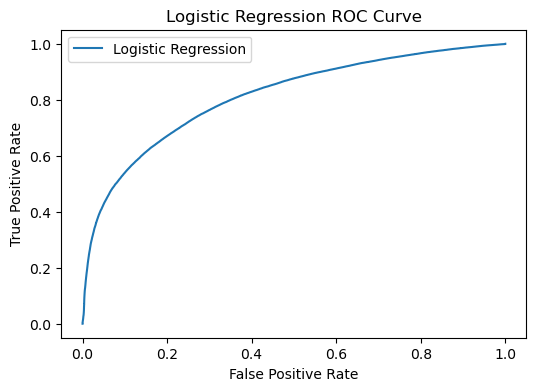

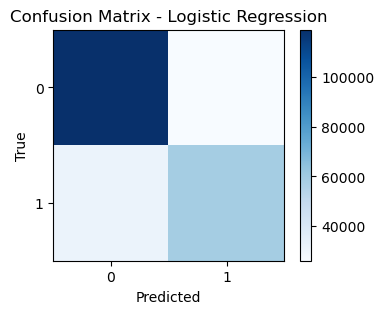

In [29]:
# Logistic Regression
from sklearn.metrics import confusion_matrix
logistic_classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logistic_classifier.fit(X_train, y_train)
logistic_y_pred = logistic_classifier.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_precision = precision_score(y_test, logistic_y_pred)
logistic_recall = recall_score(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)
logistic_roc_auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
logistic_confusion_matrix = confusion_matrix(y_test, logistic_y_pred)

# Print results
print('Logistic Regression Metrics:')
print(f'Accuracy: {logistic_accuracy:.2f}')
print(f'Precision: {logistic_precision:.2f}')
print(f'Recall: {logistic_recall:.2f}')
print(f'F1 Score: {logistic_f1:.2f}')
print(f'ROC AUC: {logistic_roc_auc:.2f}')
print()

# Plot ROC curve
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(logistic_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Metrics:
Accuracy: 0.92
Precision: 0.92
Recall: 0.87
F1 Score: 0.89
ROC AUC: 0.96



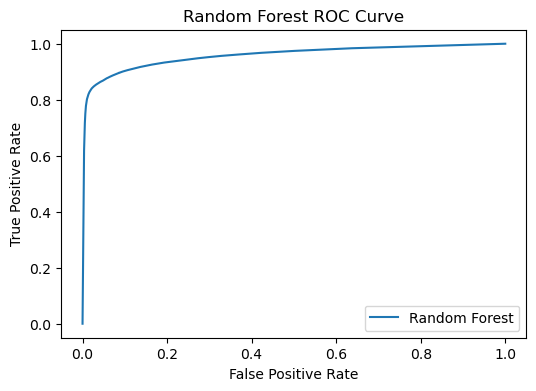

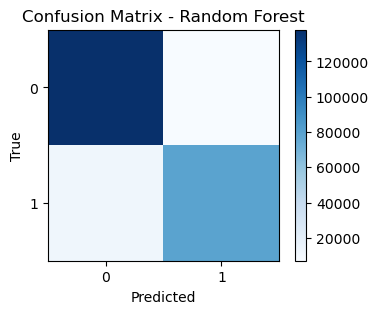

In [30]:
# Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
random_forest_y_pred = random_forest_classifier.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
random_forest_precision = precision_score(y_test, random_forest_y_pred)
random_forest_recall = recall_score(y_test, random_forest_y_pred)
random_forest_f1 = f1_score(y_test, random_forest_y_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_y_pred)

# Print results
print('Random Forest Metrics:')
print(f'Accuracy: {random_forest_accuracy:.2f}')
print(f'Precision: {random_forest_precision:.2f}')
print(f'Recall: {random_forest_recall:.2f}')
print(f'F1 Score: {random_forest_f1:.2f}')
print(f'ROC AUC: {random_forest_roc_auc:.2f}')
print()

# Plot ROC curve
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(random_forest_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Gradient Boosting Metrics:
Accuracy: 0.92
Precision: 0.96
Recall: 0.83
F1 Score: 0.89
ROC AUC: 0.96



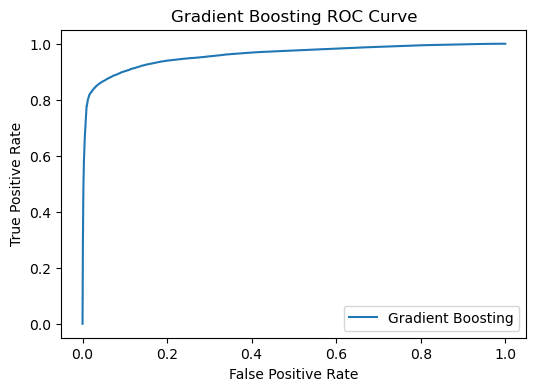

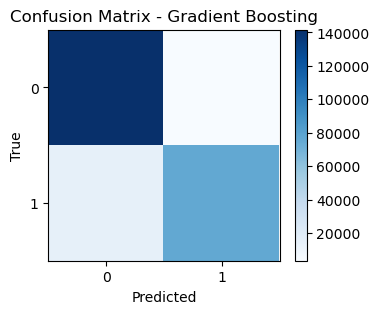

In [32]:
# Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)
gradient_boosting_y_pred = gradient_boosting_classifier.predict(X_test)

gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_y_pred)
gradient_boosting_precision = precision_score(y_test, gradient_boosting_y_pred)
gradient_boosting_recall = recall_score(y_test, gradient_boosting_y_pred)
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_y_pred)
gradient_boosting_roc_auc = roc_auc_score(y_test, gradient_boosting_classifier.predict_proba(X_test)[:, 1])
gradient_boosting_confusion_matrix = confusion_matrix(y_test, gradient_boosting_y_pred)

# Print results
print('Gradient Boosting Metrics:')
print(f'Accuracy: {gradient_boosting_accuracy:.2f}')
print(f'Precision: {gradient_boosting_precision:.2f}')
print(f'Recall: {gradient_boosting_recall:.2f}')
print(f'F1 Score: {gradient_boosting_f1:.2f}')
print(f'ROC AUC: {gradient_boosting_roc_auc:.2f}')
print()

# Plot ROC curve
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test, gradient_boosting_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(gradient_boosting_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-NN Metrics:
Accuracy: 0.86
Precision: 0.84
Recall: 0.77
F1 Score: 0.81



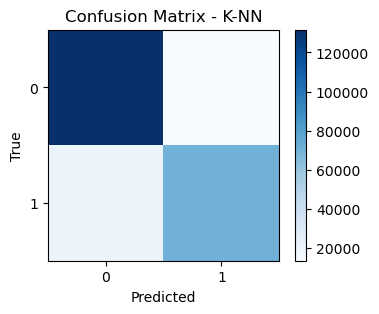

In [33]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)

# Print results
print('K-NN Metrics:')
print(f'Accuracy: {knn_accuracy:.2f}')
print(f'Precision: {knn_precision:.2f}')
print(f'Recall: {knn_recall:.2f}')
print(f'F1 Score: {knn_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(knn_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-NN')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Neural Network Metrics:
Accuracy: 0.80
Precision: 0.84
Recall: 0.60
F1 Score: 0.70



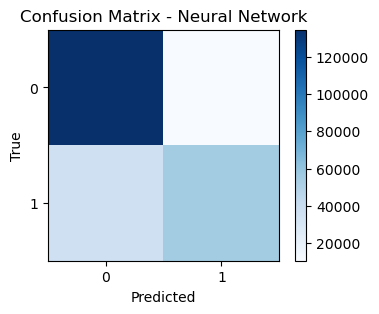

In [34]:
# Neural Network
nn_classifier = MLPClassifier(max_iter=1000)
nn_classifier.fit(X_train, y_train)
nn_y_pred = nn_classifier.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_y_pred)
nn_precision = precision_score(y_test, nn_y_pred)
nn_recall = recall_score(y_test, nn_y_pred)
nn_f1 = f1_score(y_test, nn_y_pred)
nn_confusion_matrix = confusion_matrix(y_test, nn_y_pred)

# Print results
print('Neural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.2f}')
print(f'Precision: {nn_precision:.2f}')
print(f'Recall: {nn_recall:.2f}')
print(f'F1 Score: {nn_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(nn_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Naive Bayes Metrics:
Accuracy: 0.76
Precision: 0.80
Recall: 0.50
F1 Score: 0.61



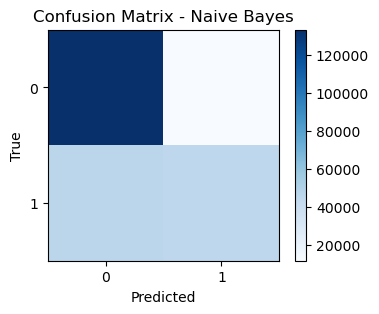

In [35]:
# Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_y_pred = naive_bayes_classifier.predict(X_test)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_y_pred)
naive_bayes_precision = precision_score(y_test, naive_bayes_y_pred)
naive_bayes_recall = recall_score(y_test, naive_bayes_y_pred)
naive_bayes_f1 = f1_score(y_test, naive_bayes_y_pred)
naive_bayes_confusion_matrix = confusion_matrix(y_test, naive_bayes_y_pred)

# Print results
print('Naive Bayes Metrics:')
print(f'Accuracy: {naive_bayes_accuracy:.2f}')
print(f'Precision: {naive_bayes_precision:.2f}')
print(f'Recall: {naive_bayes_recall:.2f}')
print(f'F1 Score: {naive_bayes_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(naive_bayes_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Decision Tree Metrics:
Accuracy: 0.89
Precision: 0.86
Recall: 0.87
F1 Score: 0.86



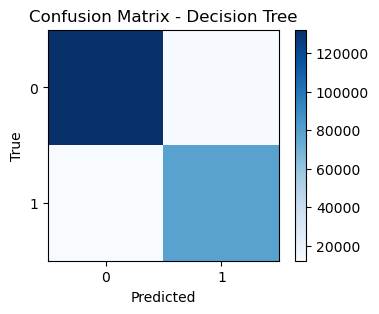

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_y_pred = model.predict(X_test)

# Calculate metrics
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
decision_tree_precision = precision_score(y_test, decision_tree_y_pred)
decision_tree_recall = recall_score(y_test, decision_tree_y_pred)
decision_tree_f1 = f1_score(y_test, decision_tree_y_pred)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_y_pred)

# Print results
print('Decision Tree Metrics:')
print(f'Accuracy: {decision_tree_accuracy:.2f}')
print(f'Precision: {decision_tree_precision:.2f}')
print(f'Recall: {decision_tree_recall:.2f}')
print(f'F1 Score: {decision_tree_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(decision_tree_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

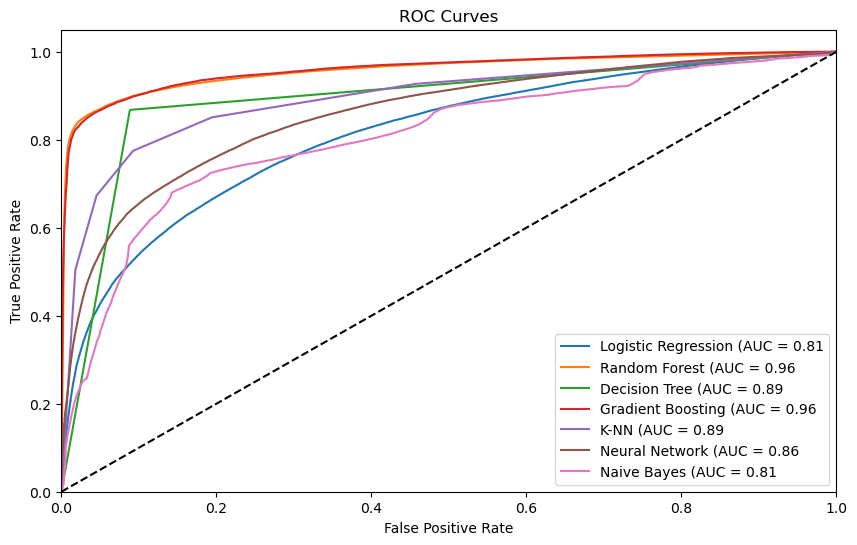

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize classifiers with previously trained models
classifiers = {
    'Logistic Regression': logistic_classifier,  # Replace with your logistic regression model
    'Random Forest': random_forest_classifier,  # Replace with your random forest model
    'Decision Tree':model,
    'Gradient Boosting': gradient_boosting_classifier,  # Replace with your gradient boosting model
    'K-NN': knn_classifier,  # Replace with your K-NN model
    'Neural Network': nn_classifier,  # Replace with your neural network model
    'Naive Bayes': naive_bayes_classifier  # Replace with your naive bayes model
}

plt.figure(figsize=(10, 6))

for name, classifier in classifiers.items():
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f} )')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()
